<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 6. <b>Кросс-валидация, регуляризация </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Першин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 1 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

In [3]:
#0) Подключение библиотек
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold

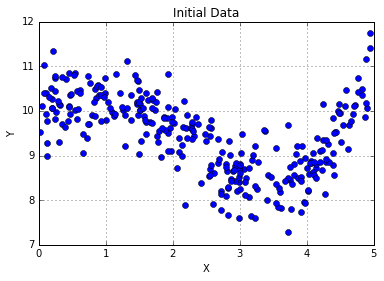

In [4]:
#1) Исходные данные
df = pnd.read_csv("Reg_A5.csv") #данные из ДЗ 5

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [221]:
#2) Построить график зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств 
#код из ДЗ 5
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)
x_train=np.array([x_train]).T
x_val=np.array([x_val]).T
x_test=np.array([x_test]).T
mse1_y=[0 for x in range(25)]
mse2_y=[0 for x in range(25)]
R1 = [0 for x in range(25)]
R2 = [0 for x in range(25)]
for i in range(1, 25):
    plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
    plModelTr_PL = plModelTr_PL.fit(x_train, y_train)
    f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_
    y_pr_val = plModelTr_PL.predict(x_val)
    y_pr_train = plModelTr_PL.predict(x_train)
    mse1_y[i] = mean_squared_error(y_train, y_pr_train)
    mse2_y[i] = mean_squared_error(y_val, y_pr_val)


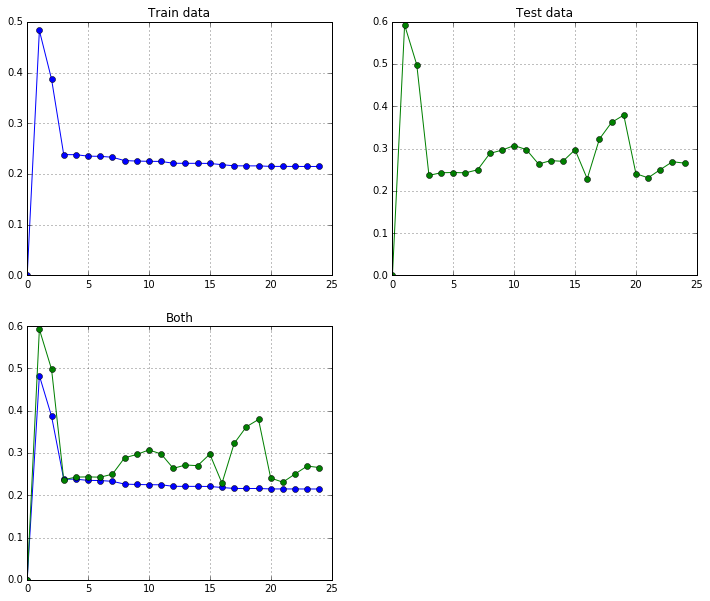

In [222]:
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(mse1_y, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(mse1_y, "-o")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)
plt.show()

In [223]:
#3) Формирование обучающего (train) и проверочного (val) подмножеств
#Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0
kf = cross_validation.KFold(n = len(x_train_init), n_folds = 4, shuffle = True, random_state = 0)

In [1]:
#4) Обучение
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

mse1 = [0 for x in range(25)]
mse2 = [0 for x in range(25)]
pf = [PolynomialFeatures(degree = i) for i in range(25)]

for TI, VI in kf:
    x_train = x_train_init[TI]
    x_val = x_train_init[VI]
    y_train = y_train_init[TI] 
    y_val =  y_train_init[VI]
    x_train = [p.fit_transform(x_train.reshape(-1, 1)) for p in pf]
    x_val = [p.fit_transform(x_val.reshape(-1, 1)) for p in pf]
       
    Reg = [LinearRegression(normalize = True).fit(q, y_train) for q in x_train]
    y_pr_train = [Reg[i].predict(x_train[i]) for i in range(25)]
    y_pr_val = [Reg[i].predict(x_val[i]) for i in range(25)]
   
    mse_train = np.array([((t - y_train)**2).sum() for t in y_pr_train]) / len(y_train)
    mse_val = np.array([((t - y_val)**2).sum() for t in y_pr_val]) / len(y_val)
    mse1 = mse1 + 0.25 * mse_train
    mse2 = mse2 + 0.25 * mse_val
    

NameError: name 'PolynomialFeatures' is not defined

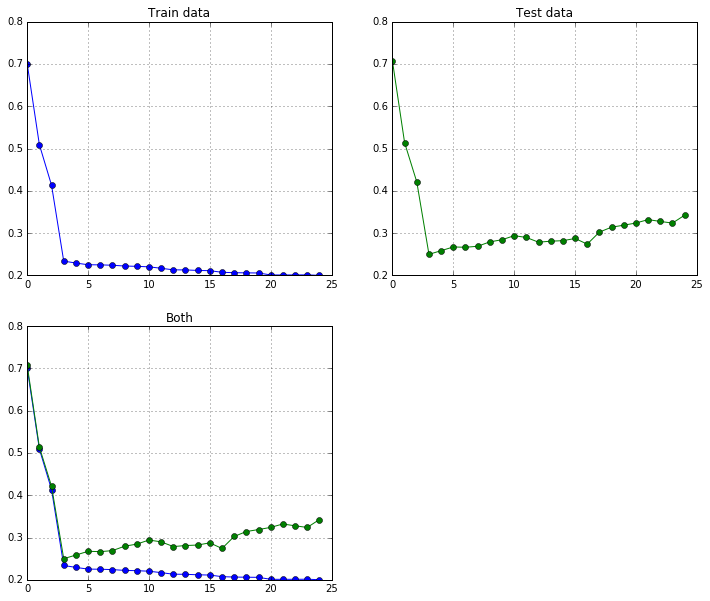

In [225]:
#5) Графики зависимости ошибки от степени полинома для обучающего и проверочного подмножеств
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(mse1, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(mse2, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(mse1, "-o")
plt.plot(mse2, "-o", color = "green")
plt.grid(True)
plt.show()

In [231]:
#6) Выбор наилучшей модели (степени полинома) + обучение на train_init
# наилучшая степень полинома равна 3

x_train_init0 = PolynomialFeatures(degree = 3).fit_transform(x_train_init.reshape(-1, 1))
x_test0 = PolynomialFeatures(degree = 3).fit_transform(x_test.reshape(-1, 1))
Reg1 = LinearRegression(normalize = True).fit(x_train_init0, y_train_init)
y_test0 = Reg1.predict(x_test0)

In [232]:
#7) Среднеквадратическая ошибка на тестовом подмножестве
mean_squared_error(y_test, y_test0)

0.22297660572404251

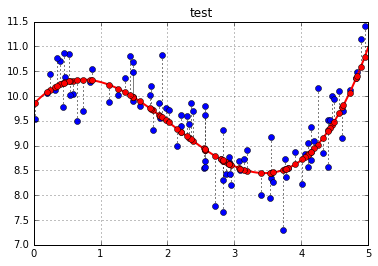

In [233]:
#8) Построить график регрессии

f_x = lambda x : polyval(x, Reg1.coef_) + Reg1.intercept_
xx = np.linspace(0, 5, 100)

plt.title('test')
plt.plot(x_test, y_test, 'o')
plt.grid(True)
plt.plot(xx, f_x(xx), color = 'red', lw = 2)
plt.plot(x_test, f_x(x_test), 'o', color = 'red', lw = 2)
plt.vlines(x_test, ymin = y_test, ymax=f_x(x_test), colors = 'black', linestyles = 'dotted')
plt.show()

In [234]:
#9) Сравнение с результатом из ДЗ 5
# в данном варианте получена более низкая среднеквадратичная ошибка, что позволяет говорить о том, что данный метод являеться предпочтительнее

<p><b>Задача 2.</b> Регрессия + регуляризация</p>

In [235]:
#0) Подключение библиотек
import pandas as pnd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

%matplotlib inline

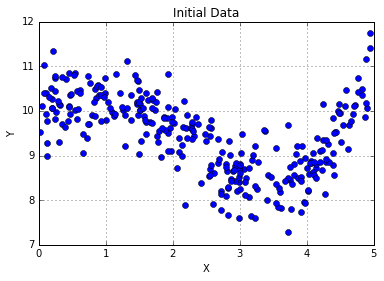

In [236]:
#1) Исходные данные
df = pnd.read_csv("Reg_A5.csv") #данные из ДЗ 5

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [237]:
#2) Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств - аналогично заданию 1 из ДЗ1
#train_init = train + val
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

In [238]:
x_train_init=np.array([x_train_init]).T
x_test=np.array([x_test]).T

In [239]:
#3) Обучение на train_init с использованием Ridge и параметрами alpha=0, fit_intercept=True, normalize=True. 
#Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!
plModelTr = Pipeline([("plF", PolynomialFeatures(degree=16)), ("Ridge", Ridge(alpha=0, fit_intercept=True, normalize=True))])
plModelTr = plModelTr.fit(x_train_init, y_train_init)

In [240]:
#4) Определить ошибку на тестовом подмножестве
y_test1 = plModelTr.predict(x_test)
mse = mean_squared_error(y_test, y_test1)
mse

0.26019298458976853

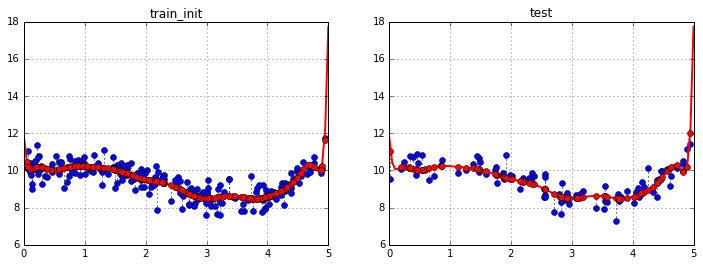

In [241]:
#5) Построить график регрессии для train_init и test
xx = np.linspace(0, 5, 100)
f_x = lambda x : polyval(x, plModelTr.named_steps["Ridge"].coef_) + plModelTr.named_steps["Ridge"].intercept_

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title('train_init')
plt.plot(x_train_init, y_train_init, 'o')
plt.grid(True)
plt.plot(xx, f_x(xx), color = 'red', lw = 2)
plt.plot(x_train_init, f_x(x_train_init), 'o', color = 'red', lw = 2)
plt.vlines(x_train_init, ymin = y_train_init, ymax=f_x(x_train_init), colors = 'black', linestyles = 'dotted')


plt.subplot(1,2,2)
plt.title('test')
plt.plot(x_test, y_test, 'o')
plt.grid(True)
plt.plot(xx, f_x(xx), color = 'red', lw = 2)
plt.plot(x_test, f_x(x_test), 'o', color = 'red', lw = 2)
plt.vlines(x_test, ymin = y_test, ymax=f_x(x_test), colors = 'black', linestyles = 'dotted')
plt.show()

In [261]:
#4) Обучение с кросс-валидацией (см. задание 1 из ДЗ2) и с использованием Ridge при различных значениях коэф. регуляризации

#Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

#Для каждого значения коэф. регуляризации:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

kf = cross_validation.KFold(n = len(x_train_init), n_folds = 4, shuffle = True, random_state = 0)

    
mse1 = [0 * len(alphas)]
mse2 = [0 * len(alphas)]
pf = [PolynomialFeatures(degree = i) for i in range(25)]

for TI, VI in kf:
    x_train = x_train_init[TI]
    x_val = x_train_init[VI]
    y_train = y_train_init[TI] 
    y_val =  y_train_init[VI]
    x_train = PolynomialFeatures(degree = 16).fit_transform(x_train.reshape(-1, 1))
    x_val = PolynomialFeatures(degree = 16).fit_transform(x_val.reshape(-1, 1))
       
    Reg2 = [Ridge(alpha = i, fit_intercept = True, normalize = True).fit(x_train, y_train) for i in alphas]
    y_pr_train = [plModelTr.predict(x_train) for plModelTr in Reg2]
    y_pr_val = [plModelTr.predict(x_val) for plModelTr in Reg2]
   
    mse_train = np.array([((t - y_train)**2).sum() for t in y_pr_train]) / len(y_train)
    mse_val = np.array([((t - y_val)**2).sum() for t in y_pr_val]) / len(y_val)
    mse1 = mse1 + 0.25 * mse_train
    mse2 = mse2 + 0.25 * mse_val
    

In [262]:
#5) Найти коэф. рег. с минимальной ошибкой на val
a = alphas[list(mse2).index(min(mse2))]
a

0.00054555947811685149

In [264]:
#6) Обучение на train_init с использованием Ridge и параметром alpha=(значение из путнка 5)
plModelTr1 = Pipeline([("plF", PolynomialFeatures(degree=16)), ("Ridge", Ridge(alpha=0.00054555947811685149, fit_intercept=True, normalize=True))])
plModelTr1 = plModelTr1.fit(x_train_init, y_train_init)
y_test2 = plModelTr1.predict(x_test)

In [265]:
#7) Определить ошибку на тестовом подмножестве
mean_squared_error(y_test, y_test2)

0.22193716203537583

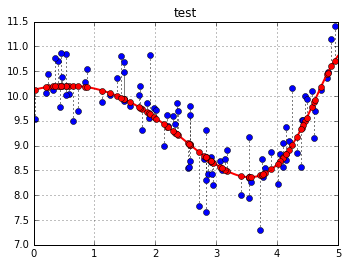

In [266]:
#8) Построить график регрессии

xx = np.linspace(0, 5, 100)
f_x = lambda x : polyval(x, plModelTr1.named_steps["Ridge"].coef_) + plModelTr1.named_steps["Ridge"].intercept_

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title('test')
plt.plot(x_test, y_test, 'o')
plt.grid(True)
plt.plot(xx, f_x(xx), color = 'red', lw = 2)
plt.plot(x_test, f_x(x_test), 'o', color = 'red', lw = 2)
plt.vlines(x_test, ymin = y_test, ymax=f_x(x_test), colors = 'black', linestyles = 'dotted')



In [267]:
#9) Сравнение с результатами из ДЗ 5 и задания 1
# в данном варианте получена еще более низкая среднеквадратичная ошибка, что позволяет говорить о том, что данный метод являеться предпочтительнее всех предыдущих